# <font color="darkblue"> Prática 01: Perceptron Learning Algorithm (PLA) </font>




**Objetivos:**


*   Entender o funcionamento do PLA e dos componentes de aprendizagem.
*   Fixar o conceito de aprendizagem.



**Descrição:**

Crie uma dataset $D$ com 1000 pontos e uma função alvo $f$ para compreender o funcionamento do PLA. Para visualizar os passos do algoritmo, considere $d=2$ e assuma $X=[-1,1]\times[-1,1]$, em que $x\in X$ é escolhido com probabilidade uniforme. Escolha uma reta como função alvo, em que um lado da reta seja mapeado para $+1$ e o outro para $-1$. Gere então pontos aleatórios $x_i$ e obtenha sua classificação $y_i$ a partir da função alvo. Divida os dados em um grupo de treinamento e outro de teste. 

Após a preparação dos dados, crie uma função $PLA()$ que inicia com os pesos todos iguais a zero e, a cada iteração, deixe o algoritmo escolher aleatoriamente um dos pontos com classificação incorreta até que ele convirja. Rode o PLA sobre amostras com $N=10$ e $N=100$, teste a hipótese solução a partir de pontos diferentes (conjunto de teste) daqueles das amostras e responda a seguinte questão:

- Qual o percentual de pontos classificados corretamente para cada hipótese solução? 










# <font color="darkblue"> Solução </font>


###  Preparação dos dos dados

O objetivo da prepação dos dados é a criação da função alvo e do dataset conforme a descrição do problema. Para tanto, você deve realizar os seguintes passos:

* Crie a função alvo (uma reta) a partir de dois pontos gerados aleatoriamente;
* Calcule o coeficiente angular e o coeficiente linear (bias) e os armazene em variáveis distintas;
* Gere aleatoriamente 1000 pontos, cujas coordenadas estão no intervalo $[-1,1]$, e os adicione em uma lista $X$ correspondendo aos dados da amostra;
* Para cada ponto gerado, use a função sign() de numpy, que recebe como entrada uma reta (função alvo), para obter a classificação de cada ponto. Adicione cada classificação em uma lista $y$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from time import sleep 
import random

### Visualizando o dataset
Use a função abaixo para visualizar o dataset criado anteriormente.

In [2]:
def show_dataset(X, y, p1, p2, m, b):
    """
    Esta função tem o objetivo de exibir na tela uma amostra do dataset passado por parâmetro.
    
    Paramêtros:
    - X (matriz): Matriz 1000x2 correspondendo aos dados amostra. Cada elemento de X é uma lista que corresponde 
    às coordenadas dos pontos gerados.
    - y (list): Classificação dos pontos da amostra X.
    - p1 (list): Coordenadas do ponto p1 gerado para criar a função alvo.
    - p2 (list): Coordenadas do ponto p2 gerado para criar a função alvo.
    - m (float): Coeficiente angular da função alvo.
    - b (float): Coeficidnte linear da função alvo.
    """
    
    line = np.linspace(-1, 1, 1000) 
    plt.plot(line, m*line + b, label="f(x)", c="green")

    # Pontos usados na criacao da reta
    plt.scatter(p1[0], p1[1], c='green')
    plt.scatter(p2[0], p2[1], c='green')

    for i in range(len(X[:200])):
        if (y[i] == 1):
            plt.scatter(X[i][0], X[i][1], c='blue')
        else:        
            plt.scatter(X[i][0], X[i][1], c='red')

    plt.show()      

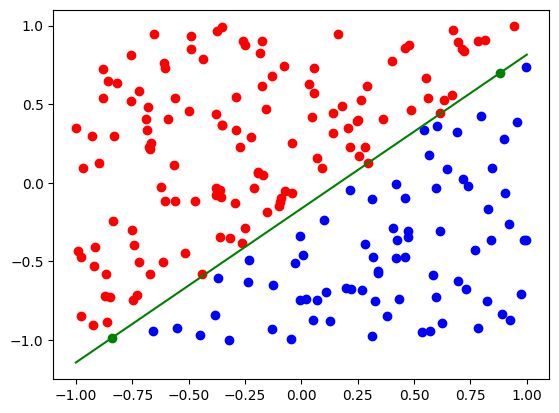

In [3]:
ponto_a = np.random.uniform(-1, 1, 2)
ponto_b = np.random.uniform(-1, 1, 2)

m = (ponto_b[1] - ponto_a[1]) / (ponto_b[0] - ponto_a[0])
b = ponto_a[1] - m * ponto_a[0]

X = []
for i in range(1000):
    X.append(np.random.uniform(-1, 1, 2))

Y = []
for ponto in X:
    Y.append(np.sign(m * ponto[0] + b - ponto[1]))

show_dataset(X, Y, ponto_a, ponto_b, m, b)

### Função para visualização dos passos do PLA
A função abaixo é uma função auxiliar que permite que vocês enxerguem o resultado de cada iteração da função PLA().

In [4]:
%matplotlib inline
def plot_grafico(X, y, w, f):   
    """
    Esta função objetiva a visualização dos passos do PLA.
    
    Paramêtros:
    - X (list[]): Matriz 1000x2 correspondendo aos dados amostra. Cada elemento de X é uma lista que corresponde 
    às coordenadas dos pontos gerados.
    - y (list): Classificação dos pontos da amostra X.
    - w (list): Lista correspondendo aos pesos do perceptron.
    - f (list): Lista de dois elementos correspondendo, respectivamente, aos coeficientes angular e linear 
    da função alvo.    
    """
    
    nPontos = len(X)    
    #matplotlib.use('TkAgg')    
            
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')

    plt.axis([-1, 1, -1, 1])

    x_plt = [X[i][0] for i in range(nPontos)]
    y_plt = [X[i][1] for i in range(nPontos)]

    for i in range(nPontos):
        if (y[i] == 1):
            plt.scatter(x_plt[i], y_plt[i], s=10, c='blue')
        else:
            plt.scatter(x_plt[i], y_plt[i], s=10, c='red')

    x = np.linspace(-1, 1, 1000)
    plt.plot(x, f[0]*x + f[1], c='green') # f[0] = m, f[1] = b
    plt.plot(x, (-w[0] - w[1]*x) / w[2], c='orange') # A*x + B*y + C => y = (-C - A*x) / B

    clear_output(wait=True)    
    plt.show(block=False)    
    plt.pause(0.01)   


### Função para construir lista de pontos classificados incorretamente
Implemente a função abaixo para contruir a lista de pontos classificados incorretamente em cada iteração do loop principal da função PLA().


In [5]:
def constroiListaPCI(X, y, w):
    """
    Esta função constrói a lista de pontos classificados incorretamente.
    
    Paramêtros:
    - X (list[]): Matriz 1000x2 correspondendo aos dados amostra. Cada elemento de X é uma lista que corresponde 
    às coordenadas dos pontos gerados.
    - y (list): Classificação dos pontos da amostra X.
    - w (list): Lista correspondendo aos pesos do perceptron.
   
    Retorno:
    - l (list): Lista com os pontos classificador incorretamente.
    - new_y (list): Nova classificação de tais pontos.
   
    """
    new_y = []
    l = []
    for i in range(len(X)):
        classificacao = np.sign(w[0] + w[1] * X[i][0] + w[2] * X[i][1])
        if classificacao != y[i]:
            l.append(X[i])
            new_y.append(y[i])
    return l, new_y                            

### Algoritmo PLA
Complete a função PLA() abaixo para implementar o Algoritmo de Aprendizagem do Perceptron conforme os slides da aula de "Significado de aprendizagem".

In [6]:
def PLA(X, y, f):
    """
    Esta função corresponde ao Algoritmo de Aprendizagem do modelo Perceptron.
    
    Paramêtros:
    - X (list[]): Matriz 1000x2 correspondendo aos dados amostra. Cada elemento de X é uma lista que corresponde 
    às coordenadas dos pontos gerados.
    - y (list): Classificação dos pontos da amostra X.
    - f (list): Lista de dois elementos correspondendo, respectivamente, aos coeficientes angular e linear 
    da função alvo.
    
    Retorno:
    - it (int): Quantidade de iterações necessárias para corrigir todos os pontos classificados incorretamente.
    - w (list): Lista de três elementos correspondendo aos pesos do perceptron.
    """
    listaPCI = X.copy()
    y_list = y.copy()
    it = 0
    w = np.zeros(3)  # Inicialização de pesos melhorada
    while len(listaPCI) > 0:
        it += 1
        i = np.random.randint(0, len(listaPCI))
        
        # Atualização dos pesos corrigida
        w[0] += y_list[i]
        w[1] += listaPCI[i][0] * y_list[i]
        w[2] += listaPCI[i][1] * y_list[i]

        listaPCI, y_list = constroiListaPCI(X, y, w)

        #plot_grafico(X, y, w, f)

    return it, w  

In [11]:
x_train = X[:800]
x_test = X[800:]
y_train = Y[:800]
y_test = Y[800:]

inicio = random.randint(0, len(x_train) - 101)
x_10 = X[inicio:inicio+10]
y_10 = Y[inicio:inicio+10]
x_100 = X[inicio:inicio+100]
y_100 = Y[inicio:inicio+100]

### Calculando a acurácia

Treine o Modelo de Aprendizagem de Máquina Perceptron com subamostras de tamanhos $N=10$ e $N = 100$, conforme o enunciado, e em seguida verifique acurácia do modelo com uma subamostra de teste que contém pontos diferentes das subamostras utilizadas para treinamento.

In [12]:
print("Treinamento com 10 pontos")
w = PLA(x_10, y_10, [m, b])
print("Iterações: ", w[0])

pontos_corretos = 0
reta = w[1]
for indice in range(len(x_test)):
    classificacao = np.sign(reta[1] * x_test[indice][0] + reta[2] * x_test[indice][1] + reta[0])
    if classificacao == y_test[indice]:
        pontos_corretos += 1

print("Porcentagem de acertos: ", pontos_corretos / len(x_test) * 100, "%")

Treinamento com 10 pontos
Iterações:  25
Porcentagem de acertos:  92.0 %


In [16]:
print("Treinamento com 100 pontos")
w = PLA(x_100, y_100, [m, b])
print("Iterações: ", w[0])

pontos_corretos = 0
reta = w[1]
for indice in range(len(x_test)):
    classificacao = np.sign(reta[1] * x_test[indice][0] + reta[2] * x_test[indice][1] + reta[0])
    if classificacao == y_test[indice]:
        pontos_corretos += 1

print("Porcentagem de acertos: ", pontos_corretos / len(x_test) * 100, "%")

Treinamento com 100 pontos
Iterações:  85
Porcentagem de acertos:  99.5 %
